# Exercises of Linear Regression

## 1. Linear Regression with One Variable

### Load adn Set up the data

-----------------------
magic function for jupyter  
[%matplotlib](http://ipython.org/ipython-doc/3/interactive/magics.html#magic-matplotlib)

[numpy.loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html#numpy-loadtxt)

[numpy.transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html#numpy-transpose)

In [16]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

In [14]:
x, y = numpy.loadtxt('ex1data1.txt',delimiter=',',usecols=(0,1),unpack=True)
x = numpy.transpose(numpy.array(x))
y = numpy.transpose(numpy.array(y))

### Plot the data

[matplotlib.pyplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html)

[matplotlib.pyplot.figure](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib-pyplot-figure)

[matplotlib.pyplot.plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html?highlight=plot#matplotlib-pyplot-plot)

[matplotlib.pyplot.grid](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.grid.html?highlight=grid#matplotlib-pyplot-grid)

[matplotlib.pyplot.xlabel](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html?highlight=xlabel#matplotlib-pyplot-xlabel)

[matplotlib.pyplot.title](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.title.html#matplotlib-pyplot-title)

Text(0.5,0,'Population of City in 10,000s')

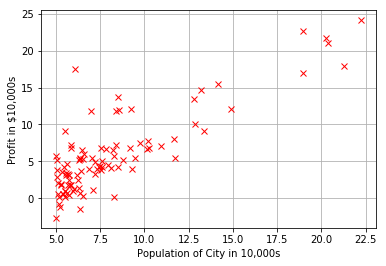

In [22]:
plt.figure()
plt.plot(x, y, 'rx')
plt.grid(True)
plt.ylabel("Profit in $10,000s")
plt.xlabel("Population of City in 10,000s")